<a href="https://colab.research.google.com/github/gabrielnd312/Credit_card_fraud_detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div><left>
  <a href = "https://github.com/gabrielnd312"><img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white" target="_blank"></a>
  <a href="https://www.linkedin.com/in/gabriel-duarte-671074146/" target="_blank"><img src="https://img.shields.io/badge/-LinkedIn-%230077B5?style=for-the-badge&logo=linkedin&logoColor=white" target="_blank"></a>
  <a href="https://medium.com/@gabrielnduarte" target="_blank"><img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white"></a>
<left></div>

#**Credit Card Fraud Detection**



<left><img width="70%" src="https://images.unsplash.com/photo-1537724326059-2ea20251b9c8?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1176&q=80"></left>

With the constant increase in online financial transactions and the increasing popularity of **e-commerce**, credit cards have become one of the most common forms of payment. However, this scenario has also opened the door to a significant increase in credit card fraud, representing an ongoing challenge for financial institutions and consumers alike.

In **2021** in Brazil alone, there was an increase of more than **30% in credit card fraud**, totaling more than 2 million fraud attempts in a period of 6 months of observation.

According to a survey conducted by `Kaspersky` in the year 2022, 20% of the Brazilian population has already suffered credit card fraud.

That is, **2 out of 10 Brazilians** have already dealt with some type of problem related to this topic.

<left><img width="60%" src="https://images.unsplash.com/photo-1586880244406-556ebe35f282?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=387&q=80"></left>


This article discusses the importance of using data science techniques and machine learning models to detect and prevent credit card fraud. We'll explore how these smart approaches can help identify suspects and increase transaction security while minimizing financial impact and user concern.


In [ ]:
#We'll start by importing the packages needed for the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler




In [ ]:
#Importing our data
dataset = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(dataset)

#**Exploratory Analysis**

<left><img width="70%" src="https://images.unsplash.com/photo-1446776653964-20c1d3a81b06?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1171&q=80"></left>


First, before any deep analysis or creation of a specific model, it is necessary to understand the dataset that is being worked on. Its complexity, characteristics, key points and what it can represent for those who analyze it.

With a brief exploratory analysis we can better understand the context to reach conclusions and propose improvements and predictions.

In [ ]:
#Original dataset
print("Size of our dataset:\t", df.shape)
print("Columns:", df.shape[0], "Rows:", df.shape[1])
df.head(10)

Size of our dataset:	 (284807, 31)
Columns: 284807 Rows: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
#Creating a test suite
test = df.sample(frac=0.15, random_state = 0)

df = df.drop(test.index)

In [ ]:
#Checking set sizes
print("Test dataset:\t", test.shape)
print("Training dataset:", df.shape)

Test dataset:	 (42721, 31)
Training dataset: (242086, 31)


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
#Description of the main columns in our dataframe
df[["Time", "Amount", "Class"]].describe()

,Time,Amount,Class
count,242086.000000,242086.000000,242086.000000
mean,94857.597379,88.612429,0.001727
std,47490.660832,247.655020,0.041517
min,0.000000,0.000000,0.000000
25%,54234.000000,5.662500,0.000000
50%,84747.000000,22.000000,0.000000
75%,139362.000000,77.580000,0.000000
max,172792.000000,19656.530000,1.000000


In [ ]:
df[(df.Class == 1) & (df.Amount < 2000)]["Amount"].describe()

count     417.000000
mean      123.706859
std       249.477727
min         0.000000
25%         1.000000
50%        11.400000
75%       106.550000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
df[(df.Class == 0) & (df.Amount < 2000)]["Amount"].describe()

count    241079.000000
mean         80.821995
std         173.334058
min           0.000000
25%           5.600000
50%          21.990000
75%          76.500000
max        1999.890000
Name: Amount, dtype: float64

<left><img width="50%" src="https://images.unsplash.com/photo-1674049404913-2005c02245fa?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=462&q=80"></left>

We may already have evidence of the large difference in the classification of frauds in our dataset, which means that transactions identified as fraud are much smaller than normal operations.

We consider `"0" = Normal and "1" = Fraud`, we see in all quartiles that most of the values ​​fit in normal transactions, and only a small group in suspected or really fraudulent transactions.

In [ ]:
#Identifying missing values
print("Table of missing values:\n", df.isnull())

print("Sum of missing values:\n", df.isnull().sum())


Table of missing values:
          Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284801  False  False  False  False  False  False  False  False  False  False   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False  False  False  False  False  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False  False  False  False  False   

        ...  

In [ ]:
print("Total of missing values:",df.isnull().sum().max())

Total of missing values: 0


All of our rows are filled in, and there are **no missing values.**

With this information, we can proceed with the analysis without needing to fill in gaps or delete information.

##Checking the imbalance between **genuine** and **fraudulent** transactions.

When dealing with financial information, especially daily transactions, it is normal for there to be a considerable imbalance of information.

**Why?**
Because thousands of bank transactions are carried out at all times, `at every second, minute, hour and day.` It is clear that in a bank, or customers of a card brand, most of these users are honest and use daily transactions in a lawful and legitimate way, so there is only a small part of fraudulent transactions.


The information in our database makes this situation clear.

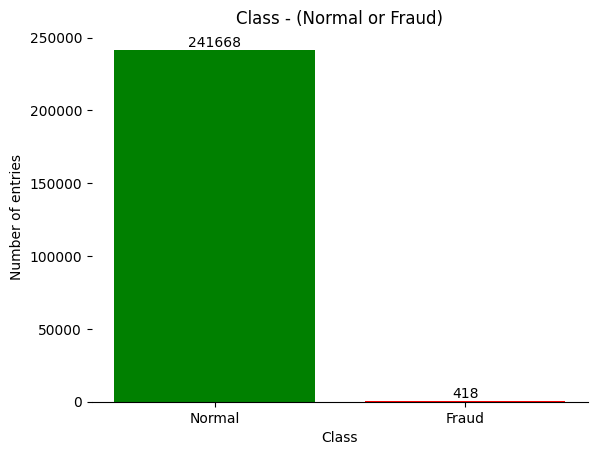

In [ ]:
#Bar Graph
class_counts = df["Class"].value_counts()

bar_colors = ["green", "red"]
plt.bar(class_counts.index, class_counts.values, color = bar_colors)

plt.xlabel("Class")
plt.ylabel("Number of entries")
plt.title("Class - (Normal or Fraud)")

for _, value in enumerate(class_counts.values):
  plt.text(class_counts.index[_], value, str(value), ha="center", va= "bottom")

class_labels = {0: "Normal", 1: "Fraud"}
plt.xticks(class_counts.index, [class_labels[x] for x in class_counts.index])

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.show()

We can easily verify that the recognition of transactions as fraudulent is **very small.**

The vast majority of transactions are identified as genuine and proceed without any type of restriction.

There may be situations and types of analysis where this variation is not so unbalanced, for example in defining a type of product that sells more, or a type of solution that is more sought after.

In these other types of questions, it is possible to have datasets divided between `50/50, 70/30, 60/40` or in the most varied ways, with a closer proportion.

##**Percentage of fraudulent transactions**


<left><img width="50%" src="https://images.unsplash.com/photo-1666875758418-947b5d2513f8?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1332&q=80"></left>


In [ ]:
fraud_percentage = (df["Class"].value_counts(normalize=True) *100).loc[1]
print(f"The percentage of entries classfied as fraud is {fraud_percentage:.4f}%.")

The percentage of entries classfied as fraud is 0.1727%.


In this way we identify the small amount that fraudulent transactions represent in our dataset.

A total of **0.17%**, with 492 transactions considered fraud, and over 280,000 normal transactions.


Let's use histograms to identify this information in a more visual way.

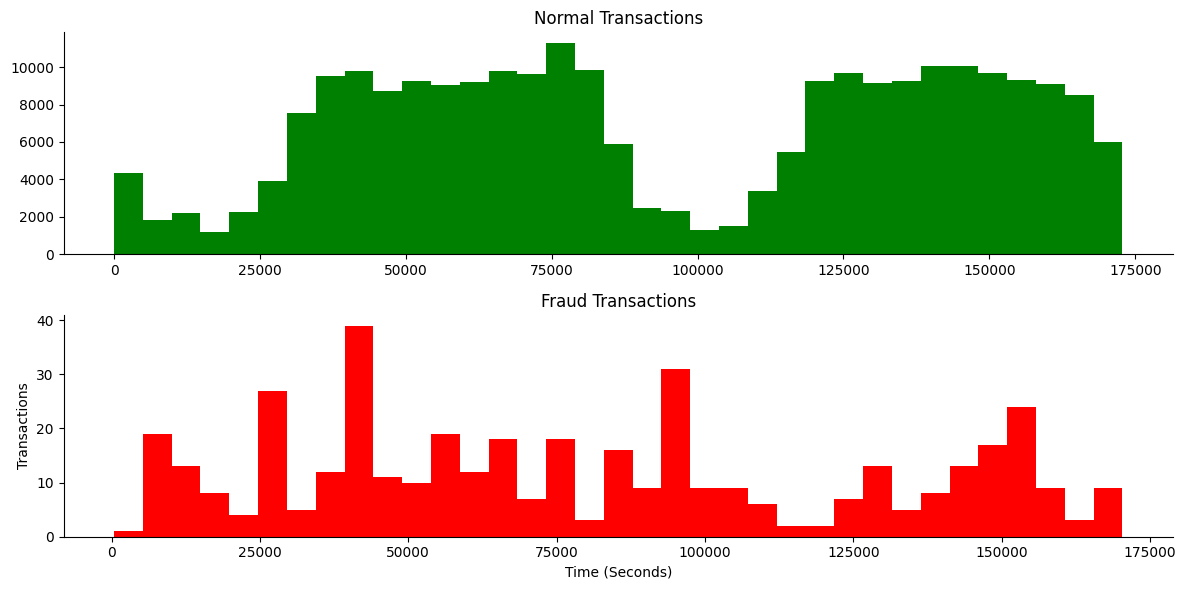

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,6))

num_bins = 35

ax[0].hist(df.Time[df.Class == 0], bins = num_bins, color = "green")
ax[0].set_title("Normal Transactions")
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)

ax[1].hist(df.Time[df.Class == 1], bins = num_bins, color = "red")
ax[1].set_title("Fraud Transactions")
ax[1].set_xlabel("Time (Seconds)")
ax[1].set_ylabel("Transactions")
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

plt.tight_layout()

#**Boxplot**

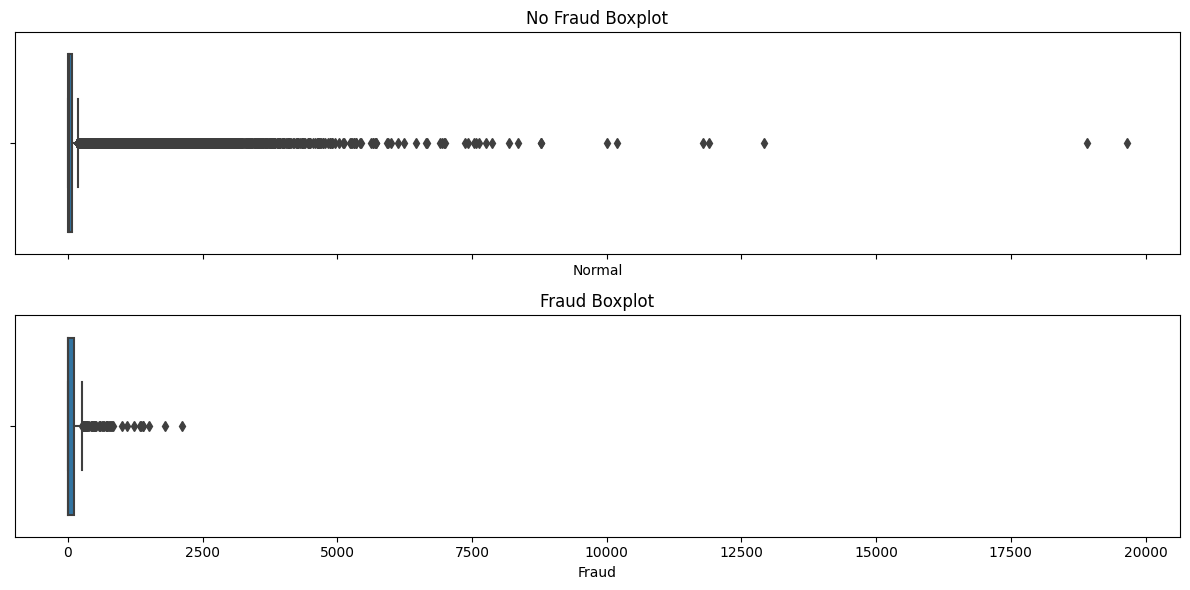

In [ ]:
df_no_fraud = df[df["Class"] == 0]

df_fraud = df[df["Class"] == 1]

fig, ax = plt.subplots (2, 1, figsize = (12, 6), sharex = True)

sns.boxplot(x=df_no_fraud["Amount"], ax=ax[0])
ax[0].set_title("No Fraud Boxplot")
ax[0].set_xlabel("Normal")


sns.boxplot(x=df_fraud["Amount"], ax=ax[1])
ax[1].set_title("Fraud Boxplot")
ax[1].set_xlabel("Fraud")


plt.tight_layout()
plt.show()

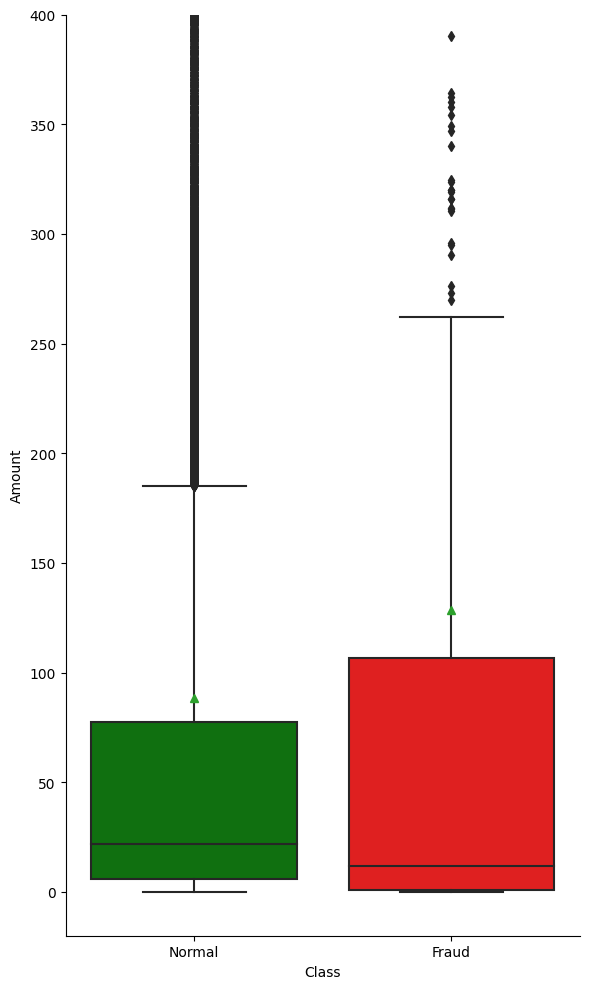

In [ ]:
fig, ax = plt.subplots(figsize = (6, 10), sharex = True)
colors = ["green", "red"]

sns.boxplot(x="Class", y="Amount", data=df, showmeans = True, ax=ax, palette=colors)
plt.ylim((-20, 400))
plt.xticks([0, 1], ["Normal", "Fraud"])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

When analyzing the boxplots considering the `"Amount"`, we identified a difference in relation to these values.

#**Density**
Density plots are very useful for visually identifying **large differences** between parameters.

In a very visual way, we don't need to know the numbers to easily identify the differences. Here we can demonstrate the differences in each of the entries.


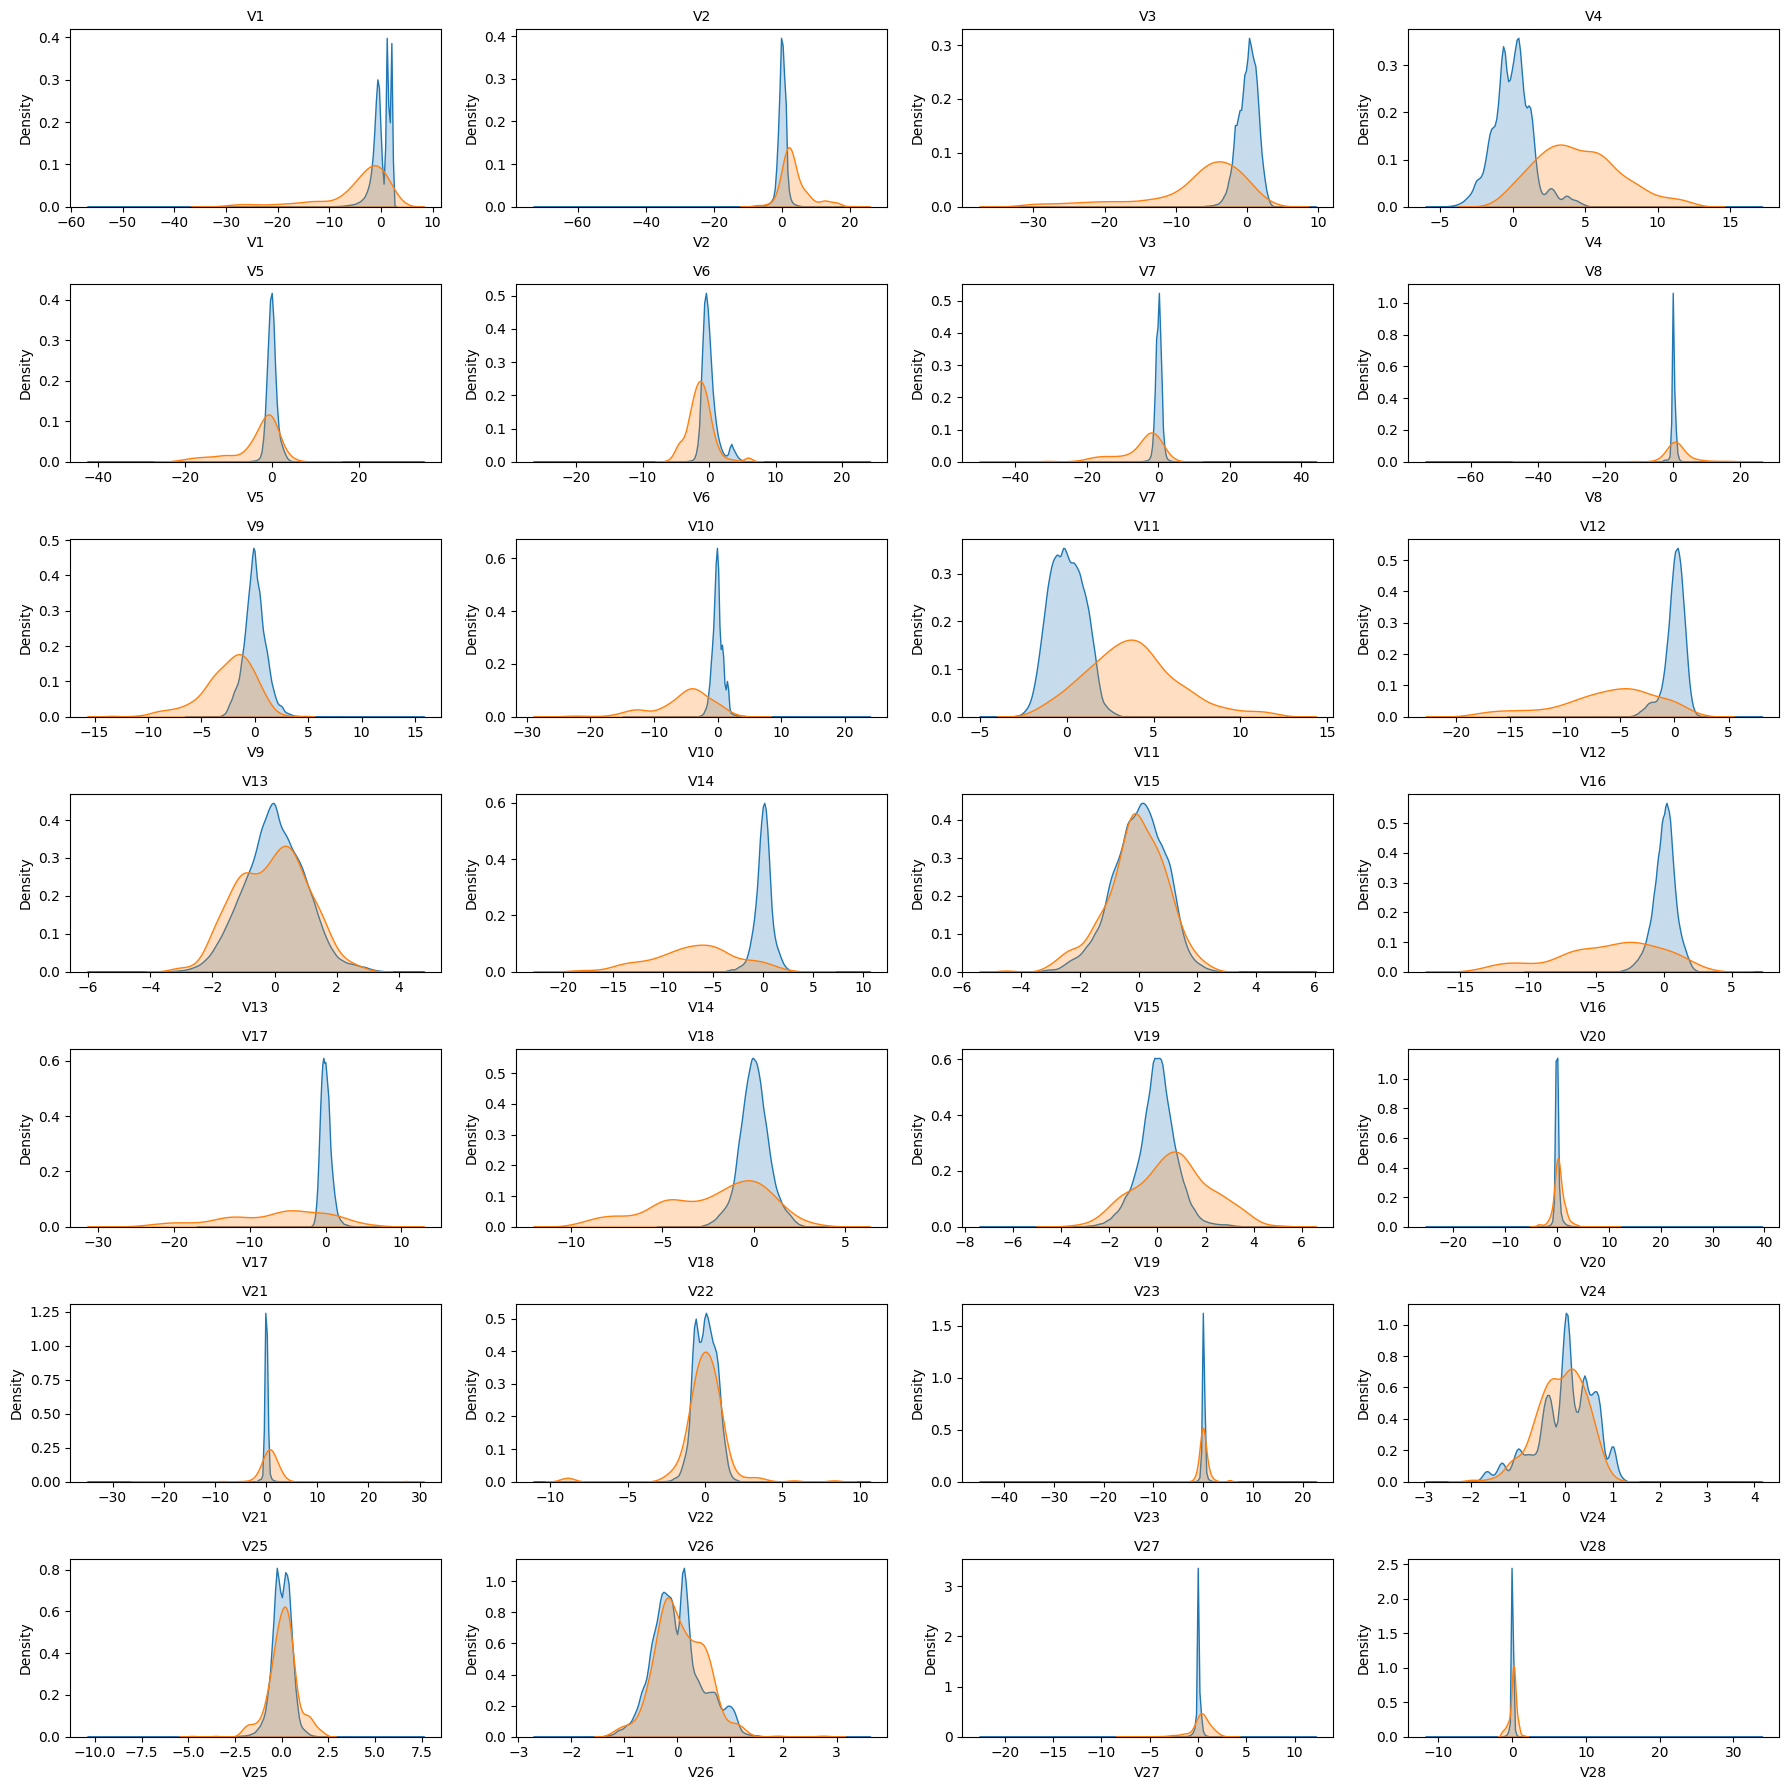

In [ ]:
column_names = df.drop(["Class", "Amount", "Time"], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows = 7, ncols = 4, figsize = (18, 18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
  idx += 1
  plt.subplot(7, 4, idx)
  sns.kdeplot(df_class_0[col], label="Class 0", fill = True)
  sns.kdeplot(df_class_1[col], label="Class 1", fill = True)
  plt.title(col, fontsize = 10)

plt.tight_layout()

Above we can identify similar graphs where the degree of difference is not so great and follows a pattern. In this scenario we can point out the `"V13"` and `"V15"` graphics for example.

But others like `"V4", "V7", "V8", "V14", "V16"` and others, have a huge degree of difference.

Resumo de conclusões até o momento
Dataset desbalanceado
Sem valores ausentes em qualquer coluna
Colunas Time e Amount não estão normalizadas

#**Data preparation**

<left><img width="70%" src="https://images.unsplash.com/photo-1544383835-bda2bc66a55d?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=836&q=80"></left>


As this is a classification issue, we will use `Logistic Regression`. For this, it is necessary to process our data and adapt it for this purpose.

---> **We will standardize the information**

---> **Split our data into training data and test data**

---> **Balance the data**

---> **Avoid overfitting**


In [ ]:
 df_clean = df.copy()

 std_scaler = StandardScaler()
 df_clean["std_amount"] = std_scaler.fit_transform(df_clean["Amount"].values.reshape(-1, 1))
 df_clean["std_time"] = std_scaler.fit_transform(df_clean["Time"].values.reshape(-1,1 ))

 df_clean.drop(["Time", "Amount"], axis=1, inplace=True)

 df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


To follow up, the separation between `training data` and `validation data` is performed.

In [ ]:
#Separate X and Y
X = df_clean.drop("Class", axis = 1)
y = df["Class"]

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle = True)


#**Data balancing**


0    313
1    313
Name: Class, dtype: int64


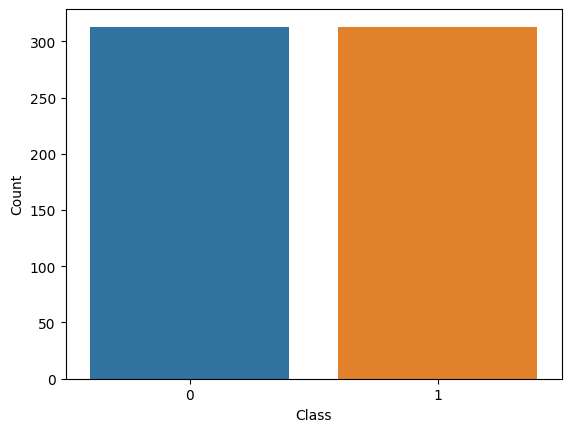

In [ ]:
#use under-sampling technique
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

class_counts_after = pd.Series(y_rus).value_counts()
print(class_counts_after)

data = pd.DataFrame({
     "Class":["0","1"],
     "Count":[class_counts_after[0], class_counts_after[1]]

})

sns.barplot(x="Class", y="Count", data=data);

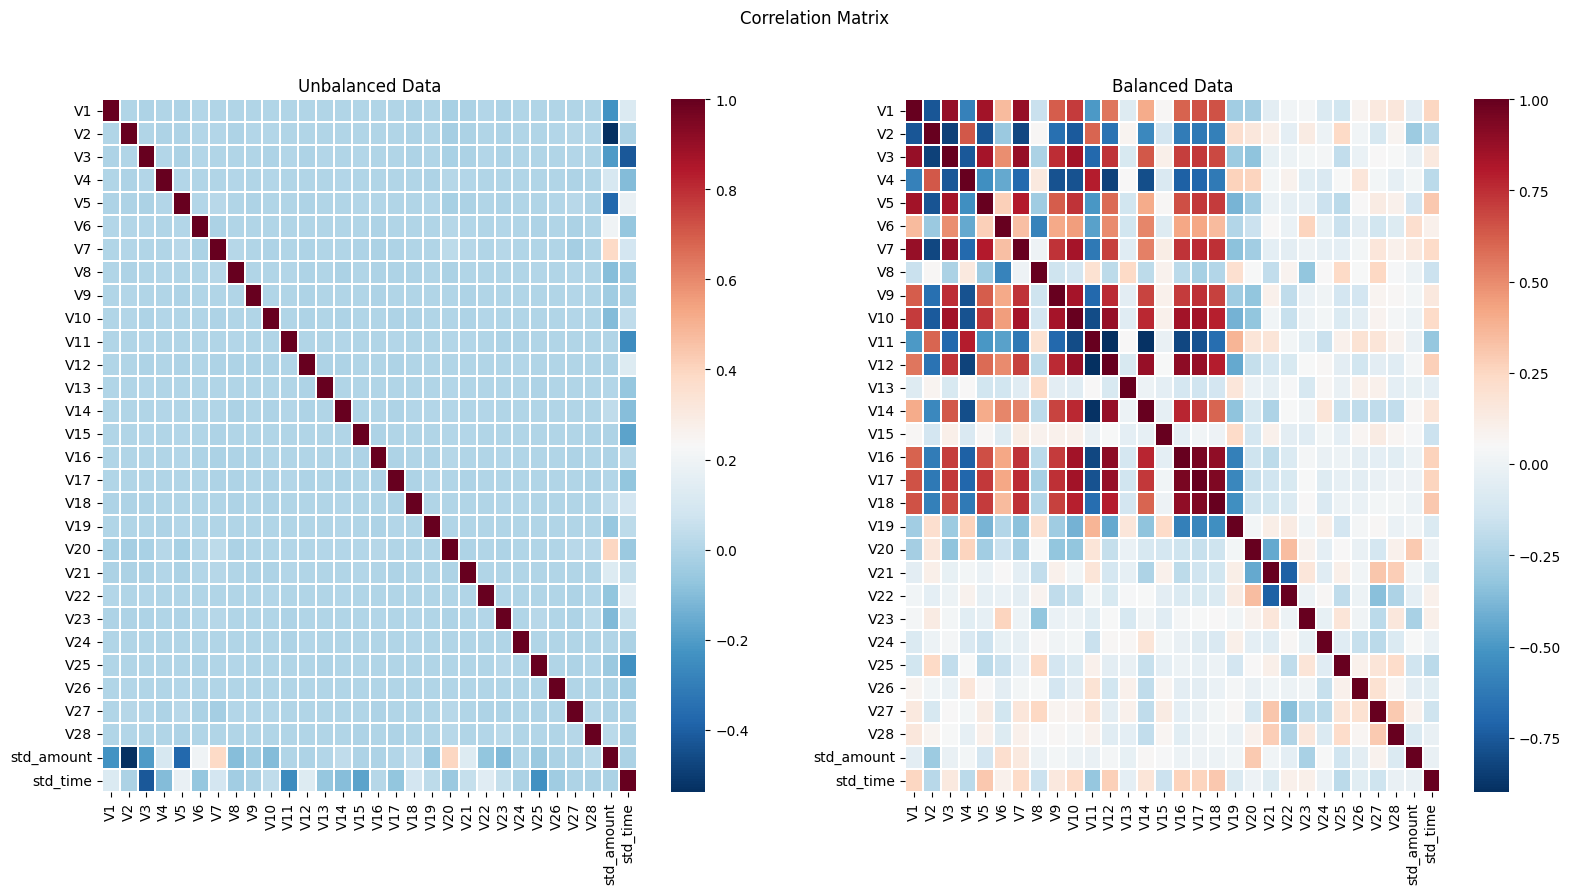

In [ ]:
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19,9))

fig.suptitle("Correlation Matrix")

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,
            linewidths = .1, cmap = "RdBu_r", ax=ax[0])
ax[0].set_title("Unbalanced Data")


sns.heatmap(corr_rus, xticklabels = corr.columns, yticklabels = corr.columns,
            linewidths = .1, cmap = "RdBu_r", ax=ax[1])
ax[1].set_title("Balanced Data")

plt.show()

With correlation matrix graphs, we can check the difference between `data before` balancing and `after`.

It is much more interesting to extract some relevant information with the data properly balanced.

#**Machine Learning Model**

Data preparation as well as the initial exploratory analysis were completed.

For the next steps of our model, we will use a `Logistic Regression` classifier

In [ ]:
#Instantiate hyperparameters
np.random.seed(2)
model = LogisticRegression()

#Train a logistic regression model
model.fit(X_rus, y_rus)

#Make predictions (test data)
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

Our model was trained and predictions made.

Now we can go to another part of the model, evaluating its performance.

It is important to remember that even with a high accuracy, the model can miss most of the problems of interest.

Below we will include a `confusion matrix `and check the rate of genuine transactions and fraudulent transactions.

#**Confusion Matrix**

A confusion matrix (also known as an error matrix) is an essential tool for evaluating the performance of a classification model in supervised learning problems.

It provides detailed information on how the model is `correctly` and `incorrectly` classifying different classes in the dataset.

A confusion matrix is particularly useful for binary classification problems, where there are two distinct classes, such as `"positive"` and `"negative"`, `"true"` and `"false"` etc. However, it can be extended to multiclass classification problems as well.



<center><img width="45%" src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Z54JgbS4DUwWSknhDCvNTQ.png"></center>

Let's understand the four main elements of the confusion matrix:

`True Positive (TP)`: It indicates the number of observations correctly classified as belonging to the positive class.

`False Positive (FP)`: It indicates the number of observations incorrectly classified as belonging to the positive class when, in reality, they belong to the negative class. It is a type I error (false positive).

`True Negative (TN)`: It indicates the number of observations correctly classified as belonging to the negative class. In these cases, the model correctly predicted the negative class.

`False Negative (FN)`: It indicates the number of observations incorrectly classified as belonging to the negative class when, in reality, they belong to the positive class. It is a type II error (false negative).



In [ ]:
!pip install scikit-plot -q
import scikitplot as skplt



Classification Report:

               precision    recall  f1-score   support

           0     0.9998    0.9669    0.9831     60417
           1     0.0453    0.9048    0.0863       105

    accuracy                         0.9668     60522
   macro avg     0.5226    0.9358    0.5347     60522
weighted avg     0.9982    0.9668    0.9815     60522

Accuracy:0.9668



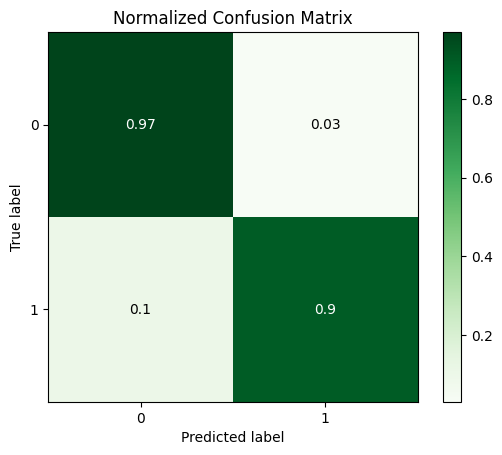

In [ ]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize = True, cmap = "Greens")

print("Classification Report:\n\n", classification_report(y_val, y_pred, digits=4))

print("Accuracy:{:.4f}\n".format(accuracy_score(y_val, y_pred)))


We will use the `AUC ("Area Under the Roc Curve")` benchmark.

The AUC value ranges from `0 to 1`, and the **closer to 1**, the better.

It divides classes in the value` 0.5` -> Less than this value goes to a certain class, and if it is greater, it goes to the other.

If a model misses 100% of its predictions, it means its `AUC equals 0`

If a model hits 100% of its predictions, its `AUC is considered 1.`

In [ ]:
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

AUC: 0.9358




In the current model we are working on, an `AUC of 93%` was identified

#**Making Predictions on the Test Set**

Our data was divided into 3 main sets:

-> **Training**

-> **Validation**

-> **Test**

At this point we have already made predictions for the validation set, and now we can check the potential of the model on our test set.

However, as there is a difference in the way the data is arranged in the `"Time" `column and in the `"Amount"` column, it is necessary to previously standardize these columns.

In [ ]:
test_clean = test.copy()

std_scaler = StandardScaler()

test_clean["std_amount"] = std_scaler.fit_transform(test_clean["Amount"].values.reshape(-1, 1))
test_clean["std_time"] = std_scaler.fit_transform(test_clean["Time"].values.reshape(-1, 1))

test_clean.drop(["Time", "Amount"], axis = 1, inplace = True)

In [ ]:
test_clean.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827
134016,0.039885,2.170693,-2.012595,1.653119,0.615994,-1.770922,0.704471,0.057144,-0.013400,-0.626777,...,0.009633,0.218813,0.248031,-0.507112,-0.420895,0.195478,-0.148335,0,-0.323727,-0.293998
204962,-0.415555,1.625917,1.622797,4.506173,-0.374560,0.901055,-0.405768,0.713219,-1.475385,1.357174,...,1.126090,-0.110493,-0.068424,-0.658170,0.512898,0.377955,0.204762,0,-0.318531,0.862804
60121,1.449410,-0.468795,0.341725,-0.791574,-0.893115,-0.749088,-0.592331,-0.134093,-0.670525,0.625412,...,-0.531360,0.076941,-0.179287,0.287474,-0.446508,0.006978,0.015877,0,-0.306014,-0.956267
167362,1.971810,-1.200239,-2.830201,-1.670140,1.732721,3.287608,-1.111164,0.818960,-0.336061,0.226586,...,0.191050,0.114907,0.622991,-0.123644,-0.192286,0.006081,-0.015564,0,0.090991,0.507023
112790,-1.367879,-0.238217,1.871754,3.050801,-1.438600,2.489319,1.154520,0.337130,-1.042234,0.456778,...,1.050306,0.238809,-0.240770,-0.467593,0.350808,0.258001,0.083143,0,1.435468,-0.458365


In [ ]:
# X and y variables
X_test = test_clean.drop("Class", axis=1)
y_test = test["Class"]

In [ ]:
# Predictions on the test dataset

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Classification Report:

               precision    recall  f1-score   support

           0     0.9999    0.9679    0.9836     42647
           1     0.0479    0.9324    0.0911        74

    accuracy                         0.9678     42721
   macro avg     0.5239    0.9501    0.5374     42721
weighted avg     0.9982    0.9678    0.9821     42721

Accuracy: 0.9678



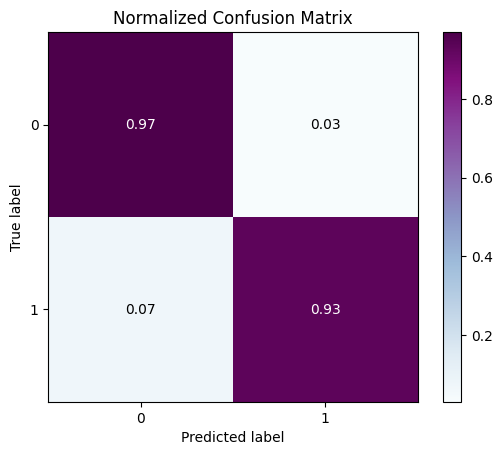

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True, cmap = "BuPu")

print("Classification Report:\n\n", classification_report(y_test, y_pred,digits = 4))

print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, y_pred)))


In [ ]:
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

AUC: 0.9501




Here we identified an `accuracy of 97%` and an `AUC of 94%`, slightly higher than the previous set.

#**Conclusions**

This project aimed to develop a machine learning model capable of effectively detecting fraudulent transactions and differentiating them from legitimate ones in credit card data.


<left><img width="70%" src="https://images.unsplash.com/photo-1613243555988-441166d4d6fd?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1170&q=80"></left>

Through meticulous data preprocessing, feature engineering, and careful selection of algorithms, we were able to create a robust and **accurate fraud detection system**.

The model achieved an accuracy of over `96%`, with `97% accuracy for true negatives` (non-fraudulent transactions) and `93% accuracy for true positives` (fraudulent transactions).

This is crucial for maintaining a good experience for **legitimate clients** and minimizing false alarms that could potentially inconvenience them.

As we move forward, we will continue to monitor the model's performance, gather new data, and explore advanced techniques to enhance its capabilities even further.

This project has yielded a powerful and reliable credit card fraud detection system that offers significant value to a organization and customers.